## COVID Data Plotting

This notebook describes 4 different COVID spreading scenarios - 2 are with UK baseline transmission values, 2 with QLD values.

The aim is to observe difference in the initial seeding strategy. That is, does a cluster or poisson seeding strategy lead to different outcomes? Cluster seeding initiates the simulation with a local group of cases, and poisson has an equal probability for each agent to begin with the disease.

The number of initial cases was fixed in all cases, and we have data from 1000 simulations.  Data file names: 

+ outbreak_cluster_size_oz: qld baseline transmission - cluster seeding strategy 
+ outbreak_cluster_size_uk: uk transmission - cluster seeding strategy 
+ outbreak_poisson_lambda_oz: qld baseline transmission - poisson seeding strategy 
+ outbreak_poisson_lambda_uk: uk transmission - poisson seeding strategy 

# Aims: 

+ To display the difference in result from the seeding strategies
+ Observe the effect of compliance (`iq_factor`), initial cluster size (`cluster_size/poisson_lambda`) and testing (`num_tests`) on the outcome
+ Describe the variance in the trials with the same settings


Note:

A normalized poisson distribution describes the probability for a discrete number of events $x$ to occur in a specified timestep. The distribution is given by:
$$ P(x) = \frac{\lambda^x e^{-\lambda}}{x!} $$
Where the unitless parameter $\lambda$ describes the expectation value. 


In [20]:
# Set-up: importing the data and loading packages
import scipy
import pandas as pd
import scipy
import numpy as np
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
# import covasim as cv
import math 
import csv
import sys



# List of variables in files
# ['outbreak', 'outbreak_day', 'outbreak_day_av', 'outbreak_day_md', 'outbreak_day_sd', 'outbreak_prob',
# 'control_prob', 'contained_prob', 'iq_factor', 'cluster_size', 'poisson_lambda', 'num_tests', 'label', 'beta', 
# 'first_case_day', 'first_case_day_av', 'first_case_day_md', 'first_case_day_sd', 'first_case_inf', 'first_case_inf_av', 
# 'first_case_inf_md', 'first_case_inf_sd', 'resurgence', 'resurgence_day', 'resurgence_day_av', 'resurgence_day_md', 'resurgence_day_sd',
# 'resurgence_prob', 'resurgence_control_prob', 'resurgence_contained_prob']

N_rows = 4000 # The largest trial has this many entries

# Create a storage matrix for the values from each file
iq_factor_M = np.empty([4,N_rows])
cluster_size_M = np.empty([4,N_rows])
poisson_lambda_M = np.empty([4,N_rows])
num_tests_M = np.empty([4, N_rows])
outbreak_prob_M = np.empty([4, N_rows])
control_prob_M = np.empty([4, N_rows])
contained_prob_M = np.empty([4, N_rows])

# Files we will use
fnames = ['outbreak_cluster_size_oz.csv','outbreak_cluster_size_uk.csv','outbreak_poisson_lambda_oz.csv','outbreak_poisson_lambda_uk.csv']

for ii in range(len(fnames)):
    print(fnames[ii])
      
    # Reading data files with pandas

    df = pd.read_csv(sys.path[0]+ '/../' + fnames[ii]) 
    # Assigning to storage matrices
    iq_factor_M[ii,0:np.size(df['iq_factor'])] = df['iq_factor']           
    cluster_size_M[ii,0:np.size(df['cluster_size'])] = df['cluster_size']  
    poisson_lambda_M[ii,0:np.size(df['poisson_lambda'])] = df['poisson_lambda']            
    num_tests_M[ii,0:np.size(df['num_tests'])] = df['num_tests']  


    outbreak_prob_M[ii,0:np.size(df['outbreak_prob'])] = df['outbreak_prob']  
    control_prob_M[ii,0:np.size(df['control_prob'])] = df['control_prob'] 
    contained_prob_M[ii,0:np.size(df['contained_prob'])] = df['contained_prob']  

        

outbreak_cluster_size_oz.csv
outbreak_cluster_size_uk.csv
outbreak_poisson_lambda_oz.csv
outbreak_poisson_lambda_uk.csv


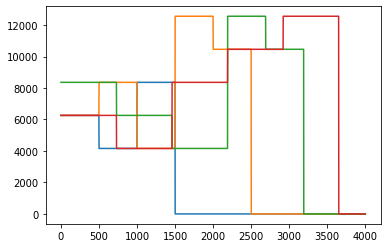

In [18]:
plt.plot(num_tests_M.T)

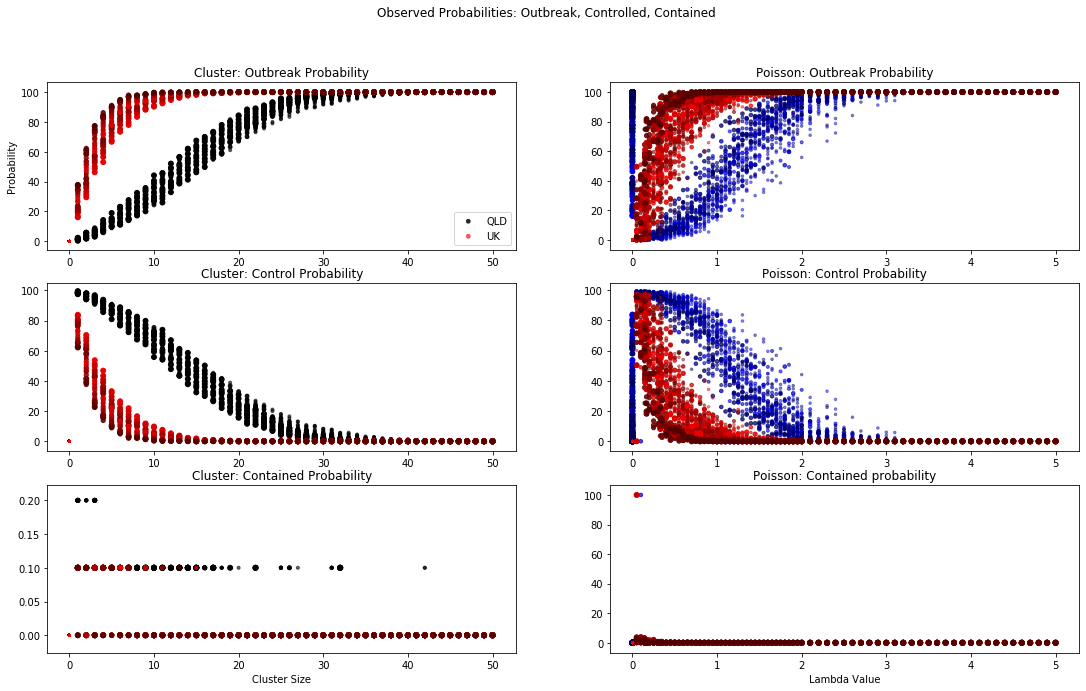

In [15]:
## Plotting the probability of certain outcomes

# Observed probabilities
fig, axs  = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Observed Probabilities: Outbreak, Controlled, Contained')

# Use colour and opacity for the iq_factor and number of tests
BlueBase = np.zeros([4,np.size(cluster_size_M[1,:])]) # Queensland is blue
BlueBase[[2,3],:] = 1 # Set the blue and opacity to 1

RedBase = np.zeros([4,np.size(cluster_size_M[1,:])]) # UK is red
RedBase[[0,3],:] = 1 # Set the red and opacity to 1

msize = 0.5 # Base marker size
mscale = 7# How the marker size scales with test amount

for ii in range(2): # Need OZ vs. UK
     
    if ii == 0:    
        cmap = BlueBase
        c_id = 2
    else:
        cmap = RedBase
        c_id = 0
    
    cmap[c_id,:] = (1-iq_factor_M[ii,:]/np.max(iq_factor_M[ii,:])+0.5)/1.5
    cmap[3,:] = (num_tests_M[ii,:]/np.max(num_tests_M[ii,:])+0.2)/1.2
    
    axs[0,0].scatter(cluster_size_M[ii,:],outbreak_prob_M[ii,:], c = cmap.T , s = [msize*mscale**(1+n) for n in num_tests_M[ii,:]/np.max(num_tests_M[ii,:])])
    axs[0,0].set_title('Cluster: Outbreak Probability')
    axs[0,0].set_ylabel('Probability')
        
    
    cmap[c_id,:] = (1-iq_factor_M[ii+2,:]/np.max(iq_factor_M[ii+2,:])+0.5)/1.5
    cmap[3,:] = (num_tests_M[ii+2,:]/np.max(num_tests_M[ii+2,:])+0.2)/1.2
        
        
    axs[0,1].scatter(poisson_lambda_M[ii+2,:],outbreak_prob_M[ii+2,:], c = cmap.T, s = [msize*mscale**(1+n) for n in num_tests_M[ii+2,:]/np.max(num_tests_M[ii+2,:])])
    axs[0,1].set_title('Poisson: Outbreak Probability')
#     axs[0,1].xlabel('Lambda Value')
    
    cmap[c_id,:] = (1-iq_factor_M[ii,:]/np.max(iq_factor_M[ii,:])+0.5)/1.5
    cmap[3,:] = (num_tests_M[ii,:]/np.max(num_tests_M[ii,:])+0.2)/1.2
    
    axs[1,0].scatter(cluster_size_M[ii,:],control_prob_M[ii,:],c = cmap.T, s = [msize*mscale**(1+n) for n in num_tests_M[ii,:]/np.max(num_tests_M[ii,:])] )
    axs[1,0].set_title('Cluster: Control Probability')
#     axs[1,0].xlabel('Cluster Size')
    
    cmap[c_id,:] = (1-iq_factor_M[ii+2,:]/np.max(iq_factor_M[ii+2,:])+0.5)/1.5
    cmap[3,:] = (num_tests_M[ii+2,:]/np.max(num_tests_M[ii+2,:])+0.2)/1.2
    
    axs[1,1].scatter(poisson_lambda_M[ii+2,:],control_prob_M[ii+2,:], c = cmap.T, s = [msize*mscale**(1+n) for n in num_tests_M[ii+2,:]/np.max(num_tests_M[ii+2,:])])
    axs[1,1].set_title('Poisson: Control Probability')
#     axs[1,1].xlabel('Lambda Value')
    
    cmap[c_id,:] = (1-iq_factor_M[ii,:]/np.max(iq_factor_M[ii,:])+0.5)/1.5
    cmap[3,:] = (num_tests_M[ii,:]/np.max(num_tests_M[ii,:])+0.2)/1.2
    
    axs[2,0].scatter(cluster_size_M[ii,:],contained_prob_M[ii,:], c = cmap.T, s = [msize*mscale**(1+n) for n in num_tests_M[ii,:]/np.max(num_tests_M[ii,:])])
    axs[2,0].set_title('Cluster: Contained Probability')
    axs[2,0].set_xlabel('Cluster Size')
    
    cmap[c_id,:] = (1-iq_factor_M[ii+2,:]/np.max(iq_factor_M[ii+2,:])+0.5)/1.5
    cmap[3,:] = (num_tests_M[ii+2,:]/np.max(num_tests_M[ii+2,:])+0.2)/1.2
    
    axs[2,1].scatter(poisson_lambda_M[ii+2,:],contained_prob_M[ii+2,:], c = cmap.T, s = [msize*mscale**(1+n) for n in num_tests_M[ii+2,:]/np.max(num_tests_M[ii+2,:])])
    axs[2,1].set_title('Poisson: Contained probability')
    axs[2,1].set_xlabel('Lambda Value')
    
axs[0,0].legend(['QLD', 'UK'])   

# plt.savefig('Probabilities_Figure.pdf')  


Figure 1: Outcome probabilities for different simulations of COVID-19. Colour represents the location (QLD/UK), with colour intensity representing normalized `iq_factor` (the leackage for isolation and quarantine, black = complete leackage), opacity and size representing `num_tests` (number of tests taken per day, small and opaque = little testing). 

Interpretation: 

There are too many variables to easily understand what is happening when shown together. From observation, the control probability in UK is more sensitive to initial values (i.e. QLD is more robust to a few cases).  Furthermore, the Poisson trials show the most variability to the paramters. This can be seen by the disturbance of the curve in the right hand figures when compared to the left. It is possible that this is caused by the number of initial cases not always being the mean. 

## Dynamics - Using Time 

COVID-19 in a real setting is a race against time. Understanding the probability of containment and outbreak helps us understand the dataset, however we need to use time to quantify the effects of seeding, compliance and testing. We have 3 recorded important dates:
+ First case
+ Outbreak 
+ Recurrence 

Using the mean and standard deviation from $1000$ simulations of each setting, we can try and understand how `iq_factor`, `cluster_size/poisson_lambda` and testing `num_tests` affects the simulation.


In [12]:

iq_factor_M = np.empty([4,N_rows])
